# Setup, imports

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/honours
%ls

/content/drive/.shortcut-targets-by-id/19ffbnjWUM9FX-8Hcysq3IAN9wHHnO781/honours
actual_afp.csv  all/                      model_creation.py  predicted_gwc.csv  run_5fold.py
actual_dbd.csv  D1actual_wsa.csv          model_plot.png     predicted_tp.csv   saturated/
actual_gwc.csv  D1predicted_wsa.csv       nonsaturated/      predicted_vwc.csv  sheets/
actual_tp.csv   dried/                    plot_functions.py  predicted_wsa.csv
actual_vwc.csv  feature_extraction.py     predicted_afp.csv  prep_functions.py
actual_wsa.csv  hyperparameter_tuning.py  predicted_dbd.csv  __pycache__/


In [10]:
from prep_functions import create_images_list, circle_cut_out, scale_fit_transform,extract_gh_values, extract_lp_values,custom_kfold_split
from plot_functions import plot_metrics,lin_regression,plot_predictions,plot_all_validation
from model_creation import build_inception,build_densenet
from run_5fold import run_5fold,model_dict

In [4]:
import pandas as pd
import cv2
import numpy as np


from google.colab.patches import cv2_imshow #colab bug with imshow

from sklearn.model_selection import KFold

from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Data preparation

In [5]:
#loading two datasets into respective dataframes
gh_df = pd.read_csv('/content/drive/MyDrive/honours/sheets/GrievesHouse.csv')
lp_df = pd.read_csv('/content/drive/MyDrive/honours/sheets/LowerPilmore.csv')

gh_df.head()

,Sample,Stable aggregates (%)
0,1,65.88
1,2,23.90
2,2,31.86
3,3,89.14
4,4,68.71


In [6]:
# creating lists of images(scaled down) and respective label
gh_path = "/content/drive/MyDrive/honours/all/GrievesHouse/*.*"
lp_path = "/content/drive/MyDrive/honours/all/LowerPilmore/*.*"

gh_colour,gh_labels = create_images_list(gh_path,(256,256))
lp_colour,lp_labels = create_images_list(lp_path,(256,256))


In [7]:
gh_values = extract_gh_values(gh_labels,gh_df)
lp_values = extract_lp_values(lp_labels,lp_df)

# Data normalisation

In [8]:
gh_colour = [circle_cut_out(i) for i in gh_colour]
lp_colour = [circle_cut_out(i) for i in lp_colour]

X_col = gh_colour + lp_colour
y = gh_values + lp_values

y = np.array(y).reshape(-1, 1)

X_col = np.reshape(X_col,(len(X_col),256,256,3))


# Inception

In [13]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

splits = []
for i,(train_idx,test_idx) in enumerate(kf.split(X_col)):
  splits.append((train_idx,test_idx))

------------------------------------------------------------------
------------------------------Fold 0------------------------------
------------------------------------------------------------------
87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/20
7/7 [==============================] - 25s 2s/step - loss: 16.2809 - mean_absolute_error: 3.2892 - root_mean_squared_error: 4.0350 - val_loss: 0.7639 - val_mean_absolute_error: 0.7079 - val_root_mean_squared_error: 0.8740
Epoch 2/20
7/7 [==============================] - 1s 115ms/step - loss: 2.2048 - mean_absolute_error: 1.1805 - root_mean_squared_error: 1.4848 - val_loss: 0.7629 - val_mean_absolute_error: 0.7154 - val_root_mean_squared_error: 0.8734
Epoch 3/20
7/7 [==============================] - 1s 106ms/step - loss: 1.2695 - mean_absolute_error: 0.9015 - root_mean_squared_error: 1.1267 - val_loss: 1.0443 - val_mean_absolute_error: 0.8085 - val_root_mean_squared_error: 1.0219
Epoch 4/20
7/7 [=================

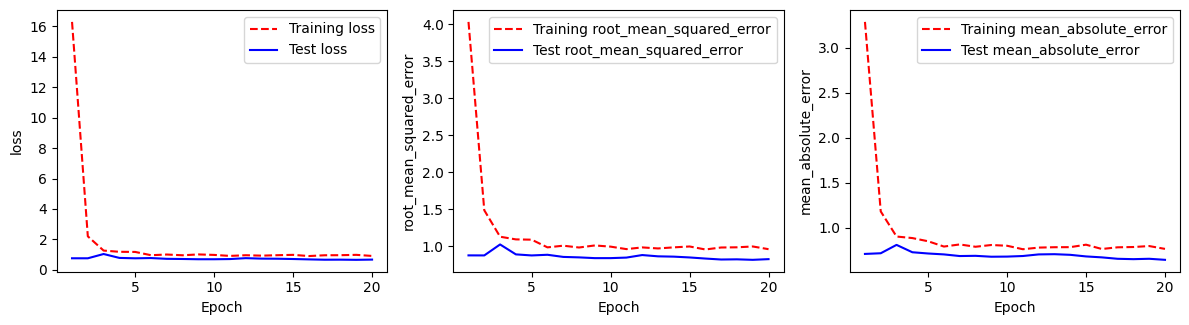

7/7 [==============================] - 1s 78ms/step


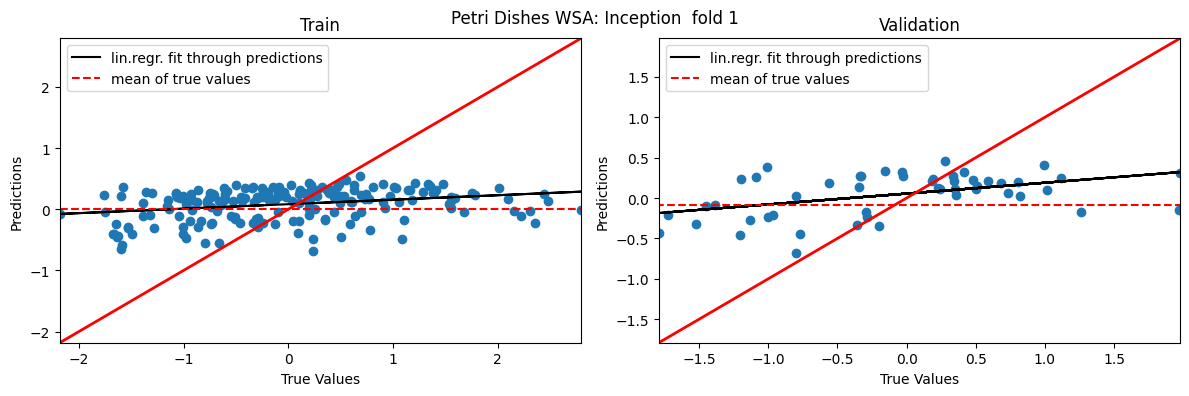

Train RMSE: 0.9623665330438917, MAE: 0.7730920572264572
Validation RMSE: 0.8230570989527599, MAE: 0.6422574354265107
------------------------------------------------------------------
------------------------------Fold 1------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 9s 339ms/step - loss: 18.7899 - mean_absolute_error: 3.6360 - root_mean_squared_error: 4.3347 - val_loss: 2.9632 - val_mean_absolute_error: 1.4606 - val_root_mean_squared_error: 1.7214
Epoch 2/20
7/7 [==============================] - 1s 107ms/step - loss: 2.0859 - mean_absolute_error: 1.1522 - root_mean_squared_error: 1.4443 - val_loss: 3.2303 - val_mean_absolute_error: 1.4600 - val_root_mean_squared_error: 1.7973
Epoch 3/20
7/7 [==============================] - 1s 109ms/step - loss: 1.5845 - mean_absolute_error: 0.9706 - root_mean_squared_error: 1.2588 - val_loss: 1.3529 - val_mean_absolute_error: 0.9383 - val_root_mean_s

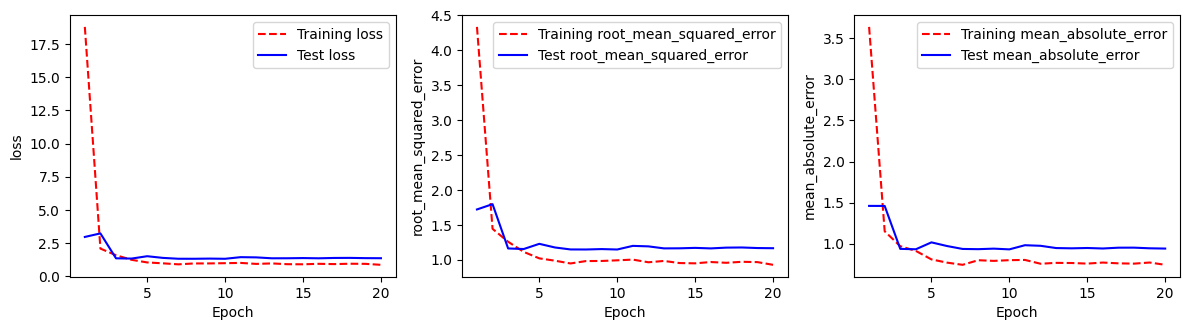

7/7 [==============================] - 1s 80ms/step


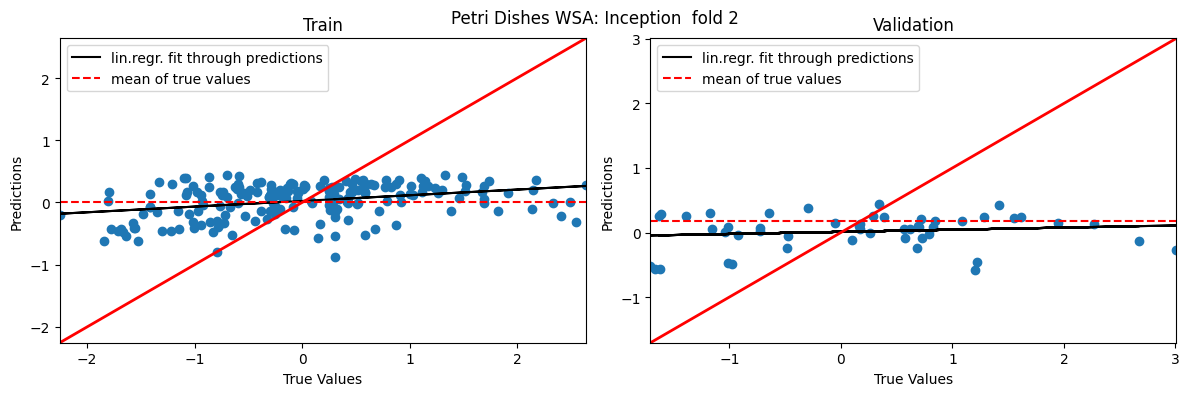

Train RMSE: 0.9455279384961736, MAE: 0.7561843681308249
Validation RMSE: 1.166475864181978, MAE: 0.9419686446214639
------------------------------------------------------------------
------------------------------Fold 2------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 15s 2s/step - loss: 20.0210 - mean_absolute_error: 3.6639 - root_mean_squared_error: 4.4745 - val_loss: 4.0141 - val_mean_absolute_error: 1.7898 - val_root_mean_squared_error: 2.0035
Epoch 2/20
7/7 [==============================] - 1s 119ms/step - loss: 2.3453 - mean_absolute_error: 1.2148 - root_mean_squared_error: 1.5314 - val_loss: 2.5349 - val_mean_absolute_error: 1.3232 - val_root_mean_squared_error: 1.5921
Epoch 3/20
7/7 [==============================] - 1s 111ms/step - loss: 1.8212 - mean_absolute_error: 1.0714 - root_mean_squared_error: 1.3495 - val_loss: 1.0141 - val_mean_absolute_error: 0.8130 - val_root_mean_squa

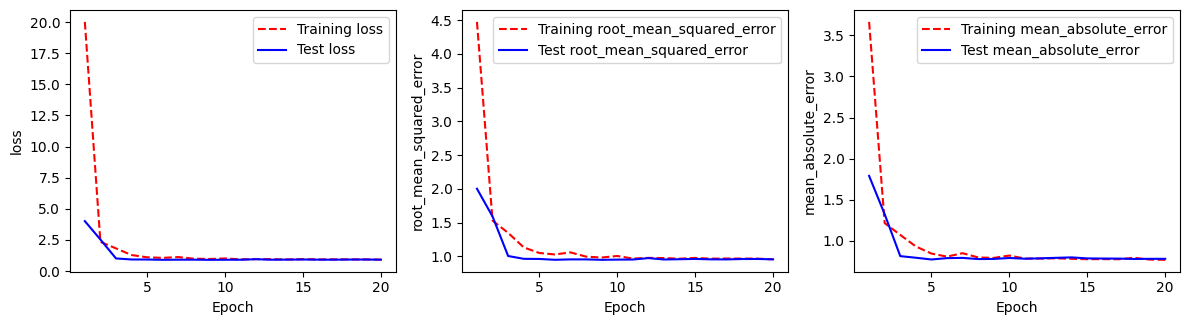

7/7 [==============================] - 1s 88ms/step


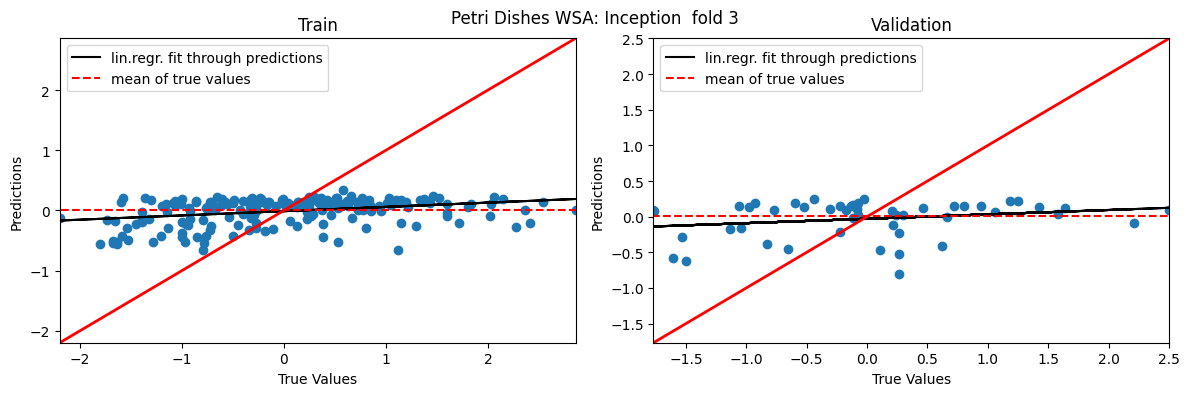

Train RMSE: 0.9520880632633113, MAE: 0.7592060916340357
Validation RMSE: 0.9577161386579879, MAE: 0.7803239112529681
------------------------------------------------------------------
------------------------------Fold 3------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 8s 338ms/step - loss: 5.9135 - mean_absolute_error: 1.9973 - root_mean_squared_error: 2.4318 - val_loss: 1.3328 - val_mean_absolute_error: 0.8432 - val_root_mean_squared_error: 1.1545
Epoch 2/20
7/7 [==============================] - 1s 118ms/step - loss: 1.7899 - mean_absolute_error: 1.0973 - root_mean_squared_error: 1.3379 - val_loss: 1.1299 - val_mean_absolute_error: 0.8161 - val_root_mean_squared_error: 1.0630
Epoch 3/20
7/7 [==============================] - 1s 120ms/step - loss: 1.1729 - mean_absolute_error: 0.8614 - root_mean_squared_error: 1.0830 - val_loss: 1.3100 - val_mean_absolute_error: 0.9912 - val_root_mean_sq

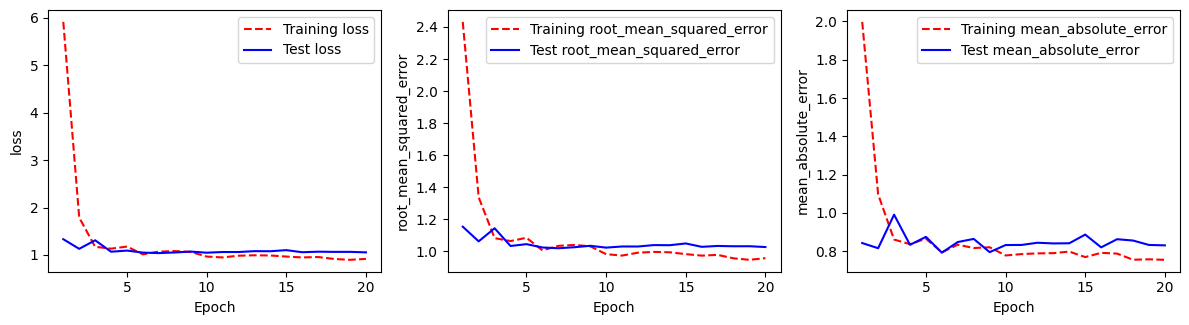

7/7 [==============================] - 1s 83ms/step


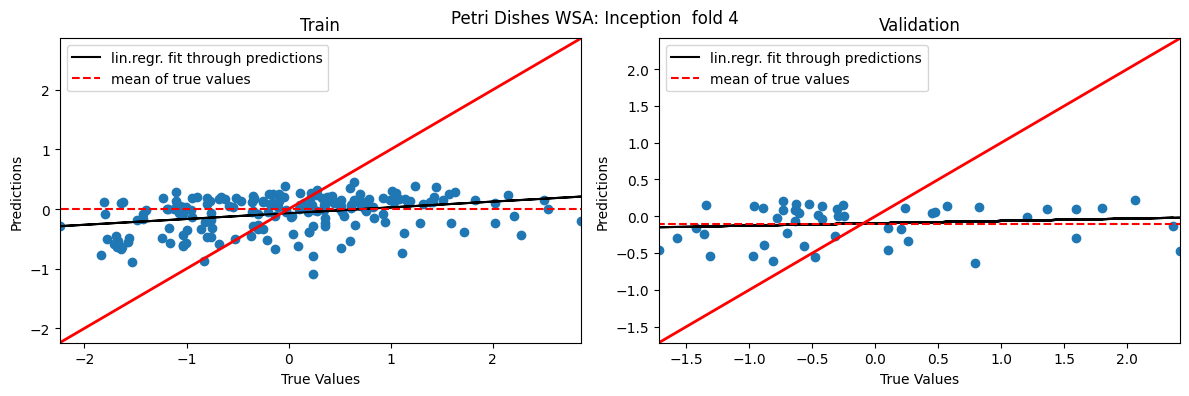

Train RMSE: 0.947726181862786, MAE: 0.7492793095937633
Validation RMSE: 1.027437537819067, MAE: 0.8310855624151154
------------------------------------------------------------------
------------------------------Fold 4------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 9s 368ms/step - loss: 6.2717 - mean_absolute_error: 2.0332 - root_mean_squared_error: 2.5043 - val_loss: 2.3632 - val_mean_absolute_error: 1.2830 - val_root_mean_squared_error: 1.5373
Epoch 2/20
7/7 [==============================] - 1s 115ms/step - loss: 2.2171 - mean_absolute_error: 1.2382 - root_mean_squared_error: 1.4890 - val_loss: 1.0027 - val_mean_absolute_error: 0.8124 - val_root_mean_squared_error: 1.0014
Epoch 3/20
7/7 [==============================] - 1s 116ms/step - loss: 1.6022 - mean_absolute_error: 0.9864 - root_mean_squared_error: 1.2658 - val_loss: 0.9533 - val_mean_absolute_error: 0.7828 - val_root_mean_squa

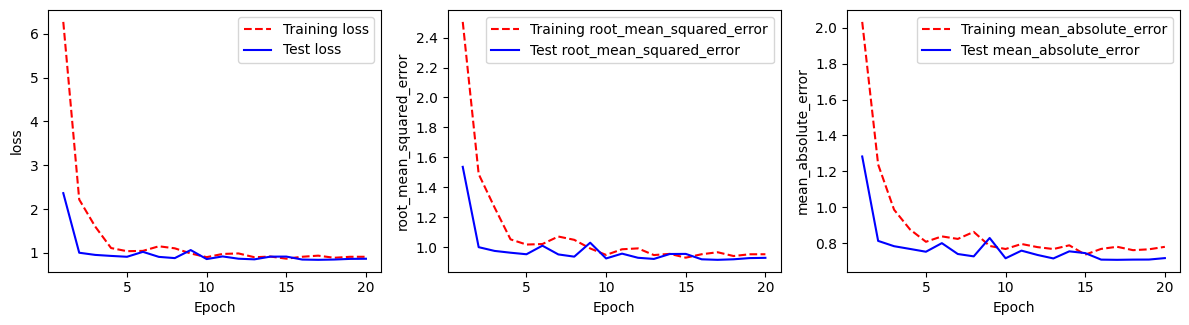

7/7 [==============================] - 1s 90ms/step


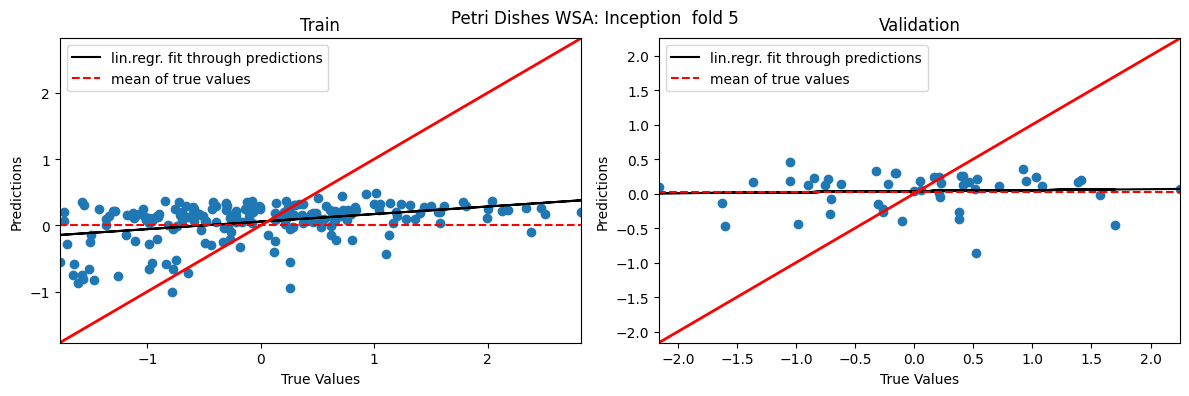

Train RMSE: 0.929332219564084, MAE: 0.7513202308713668
Validation RMSE: 0.9302199294917032, MAE: 0.7164928550158389


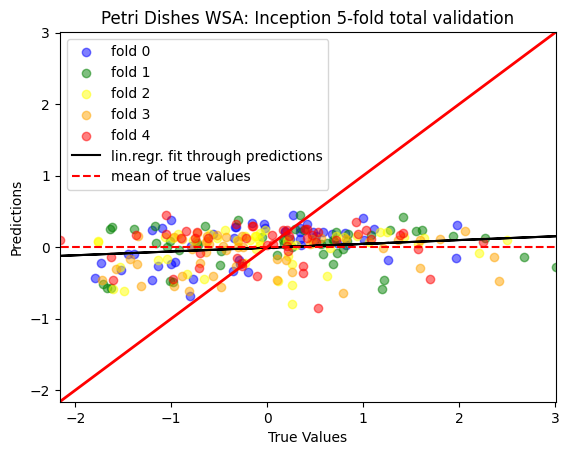

Total validation RMSE: 0.987726604879331
Total validation MAE: 0.7825041218943762


In [14]:
run_5fold('Inception','Petri Dishes','WSA', model_dict,splits,X_col,y,True,build_inception)

#DenseNet

------------------------------------------------------------------
------------------------------Fold 0------------------------------
------------------------------------------------------------------
51877672/51877672 [==============================] - 3s 0us/step
Epoch 1/20
7/7 [==============================] - 37s 3s/step - loss: 877.0633 - mean_absolute_error: 20.3320 - root_mean_squared_error: 29.6153 - val_loss: 6.4637 - val_mean_absolute_error: 2.3654 - val_root_mean_squared_error: 2.5424
Epoch 2/20
7/7 [==============================] - 1s 171ms/step - loss: 26.1179 - mean_absolute_error: 4.5771 - root_mean_squared_error: 5.1106 - val_loss: 10.2823 - val_mean_absolute_error: 3.0780 - val_root_mean_squared_error: 3.2066
Epoch 3/20
7/7 [==============================] - 1s 170ms/step - loss: 10.5228 - mean_absolute_error: 2.8694 - root_mean_squared_error: 3.2439 - val_loss: 3.6445 - val_mean_absolute_error: 1.7146 - val_root_mean_squared_error: 1.9091
Epoch 4/20
7/7 [===========

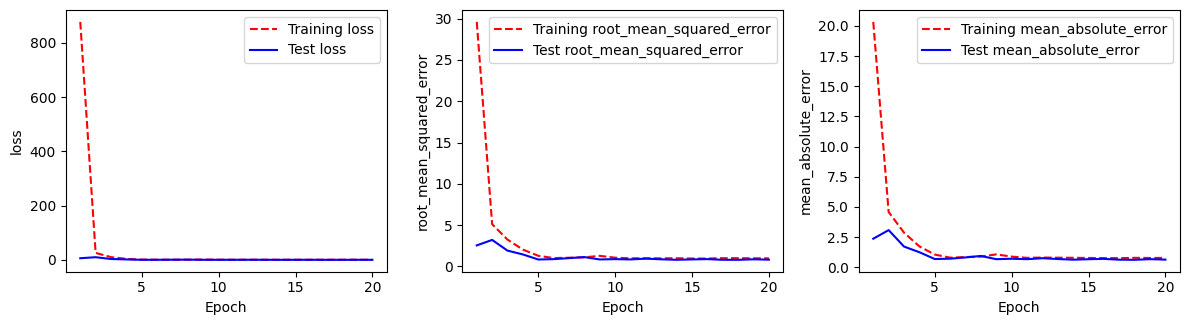

7/7 [==============================] - 1s 128ms/step


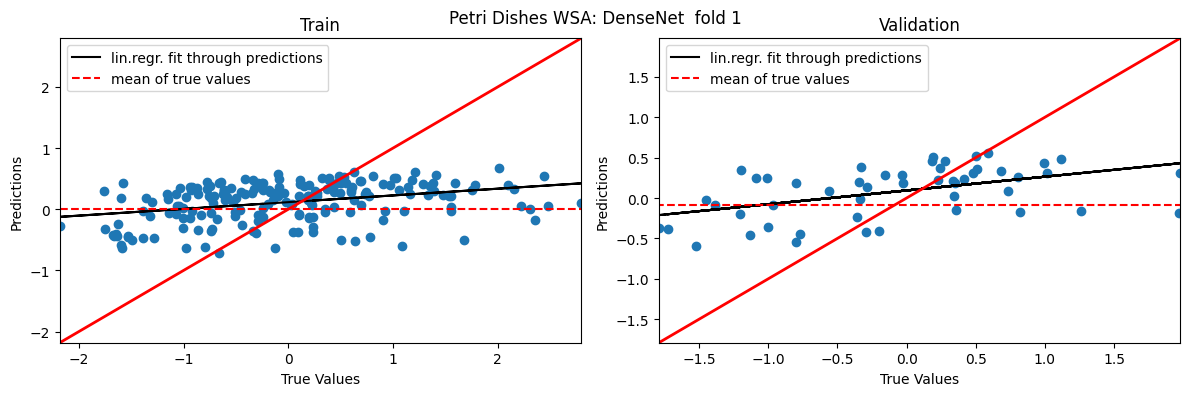

Train RMSE: 0.9457546837288962, MAE: 0.7578239468326858
Validation RMSE: 0.8123738762620712, MAE: 0.632534909828411
------------------------------------------------------------------
------------------------------Fold 1------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 17s 826ms/step - loss: 797.9913 - mean_absolute_error: 20.2803 - root_mean_squared_error: 28.2487 - val_loss: 39.7989 - val_mean_absolute_error: 6.2102 - val_root_mean_squared_error: 6.3086
Epoch 2/20
7/7 [==============================] - 1s 183ms/step - loss: 27.6902 - mean_absolute_error: 4.7777 - root_mean_squared_error: 5.2622 - val_loss: 14.2600 - val_mean_absolute_error: 3.5893 - val_root_mean_squared_error: 3.7762
Epoch 3/20
7/7 [==============================] - 1s 166ms/step - loss: 6.4405 - mean_absolute_error: 2.1745 - root_mean_squared_error: 2.5378 - val_loss: 3.8724 - val_mean_absolute_error: 1.7233 - val_root_

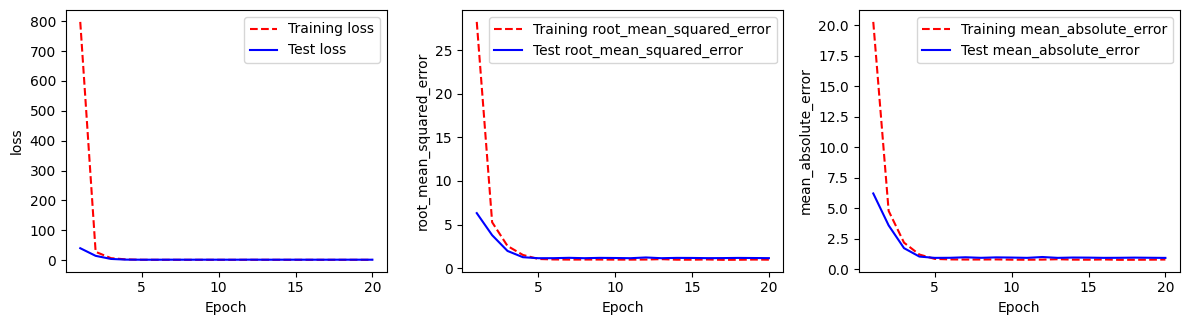

7/7 [==============================] - 1s 131ms/step


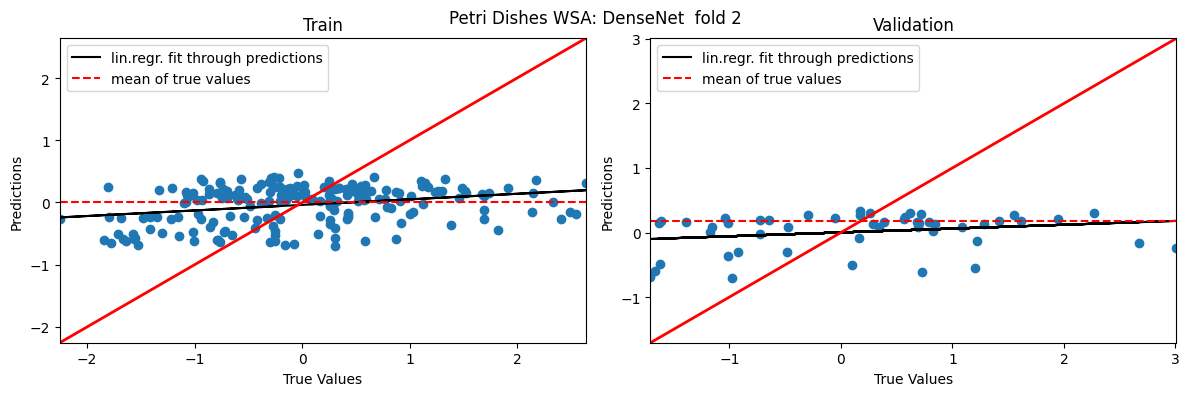

Train RMSE: 0.9565691525401212, MAE: 0.7680693800740124
Validation RMSE: 1.142048185629293, MAE: 0.9236474256008406
------------------------------------------------------------------
------------------------------Fold 2------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 25s 2s/step - loss: 857.1587 - mean_absolute_error: 20.1864 - root_mean_squared_error: 29.2773 - val_loss: 30.6917 - val_mean_absolute_error: 5.4493 - val_root_mean_squared_error: 5.5400
Epoch 2/20
7/7 [==============================] - 1s 186ms/step - loss: 26.2450 - mean_absolute_error: 4.6223 - root_mean_squared_error: 5.1230 - val_loss: 6.6203 - val_mean_absolute_error: 2.3857 - val_root_mean_squared_error: 2.5730
Epoch 3/20
7/7 [==============================] - 1s 187ms/step - loss: 5.8232 - mean_absolute_error: 2.0137 - root_mean_squared_error: 2.4131 - val_loss: 8.9357 - val_mean_absolute_error: 2.8310 - val_root_mean

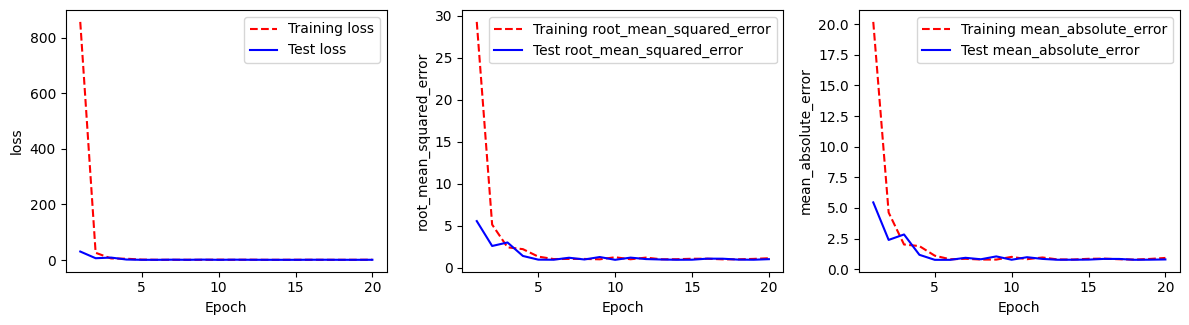

7/7 [==============================] - 1s 131ms/step


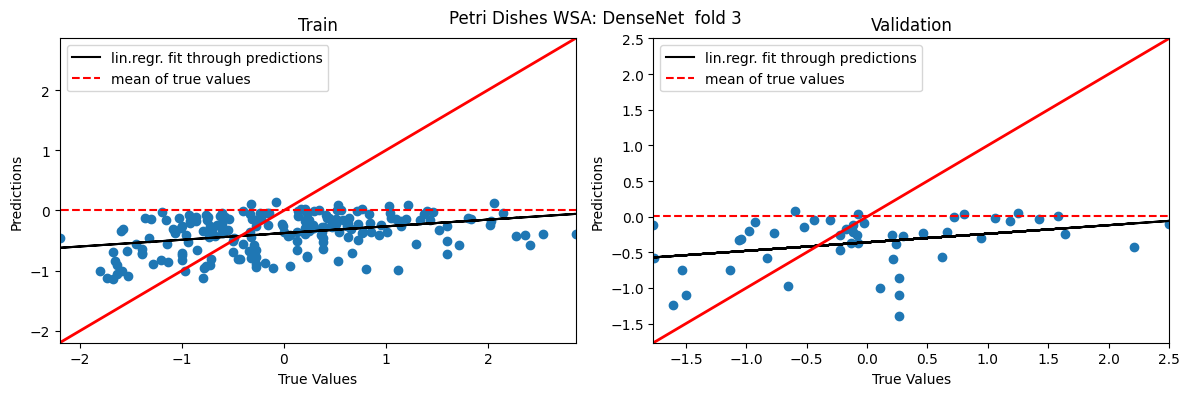

Train RMSE: 1.0071157914583344, MAE: 0.794594341120816
Validation RMSE: 1.0005032266813696, MAE: 0.7916598025506613
------------------------------------------------------------------
------------------------------Fold 3------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 16s 682ms/step - loss: 860.5854 - mean_absolute_error: 21.4398 - root_mean_squared_error: 29.3357 - val_loss: 6.2708 - val_mean_absolute_error: 2.2809 - val_root_mean_squared_error: 2.5042
Epoch 2/20
7/7 [==============================] - 1s 166ms/step - loss: 32.2561 - mean_absolute_error: 5.0390 - root_mean_squared_error: 5.6794 - val_loss: 12.6116 - val_mean_absolute_error: 3.3892 - val_root_mean_squared_error: 3.5513
Epoch 3/20
7/7 [==============================] - 1s 168ms/step - loss: 11.1333 - mean_absolute_error: 2.9260 - root_mean_squared_error: 3.3367 - val_loss: 5.9462 - val_mean_absolute_error: 2.1933 - val_root_

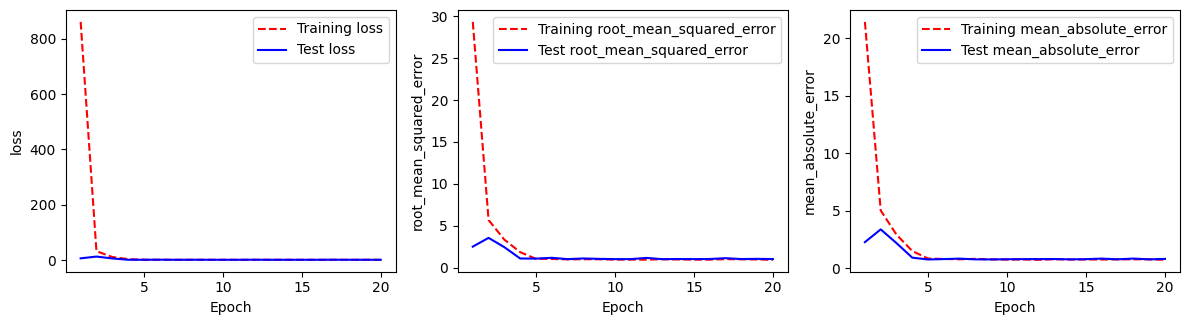

7/7 [==============================] - 1s 131ms/step


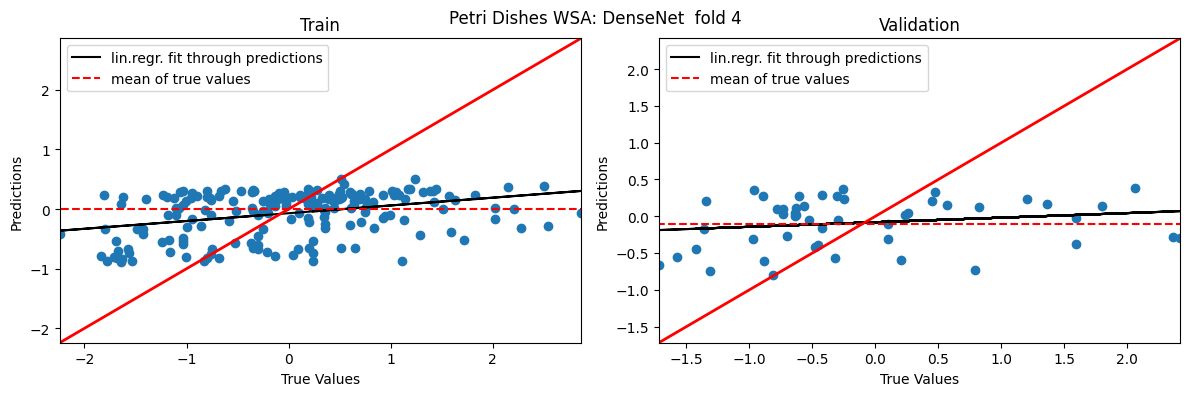

Train RMSE: 0.9403246351840546, MAE: 0.7417681407124485
Validation RMSE: 1.0198770475501298, MAE: 0.8184822406482269
------------------------------------------------------------------
------------------------------Fold 4------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 18s 844ms/step - loss: 1005.4894 - mean_absolute_error: 19.1818 - root_mean_squared_error: 31.7095 - val_loss: 1.1557 - val_mean_absolute_error: 0.8672 - val_root_mean_squared_error: 1.0750
Epoch 2/20
7/7 [==============================] - 1s 170ms/step - loss: 9.4792 - mean_absolute_error: 2.5969 - root_mean_squared_error: 3.0788 - val_loss: 8.4407 - val_mean_absolute_error: 2.7591 - val_root_mean_squared_error: 2.9053
Epoch 3/20
7/7 [==============================] - 1s 187ms/step - loss: 3.7428 - mean_absolute_error: 1.6055 - root_mean_squared_error: 1.9346 - val_loss: 0.9731 - val_mean_absolute_error: 0.7937 - val_root_m

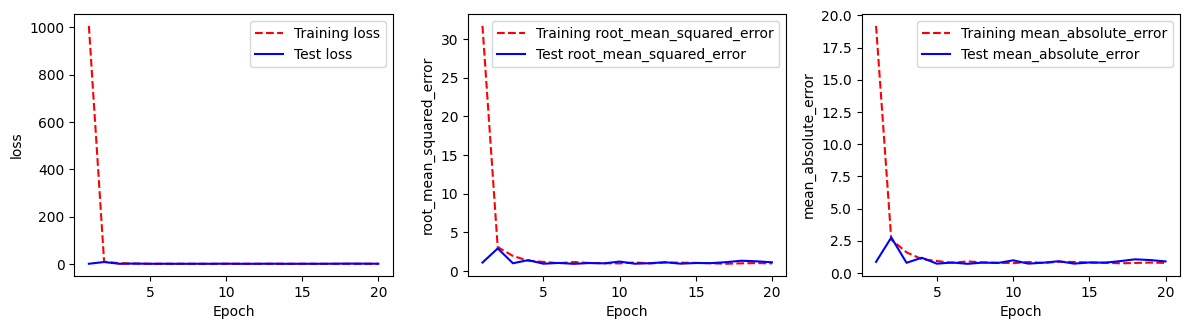

7/7 [==============================] - 1s 130ms/step


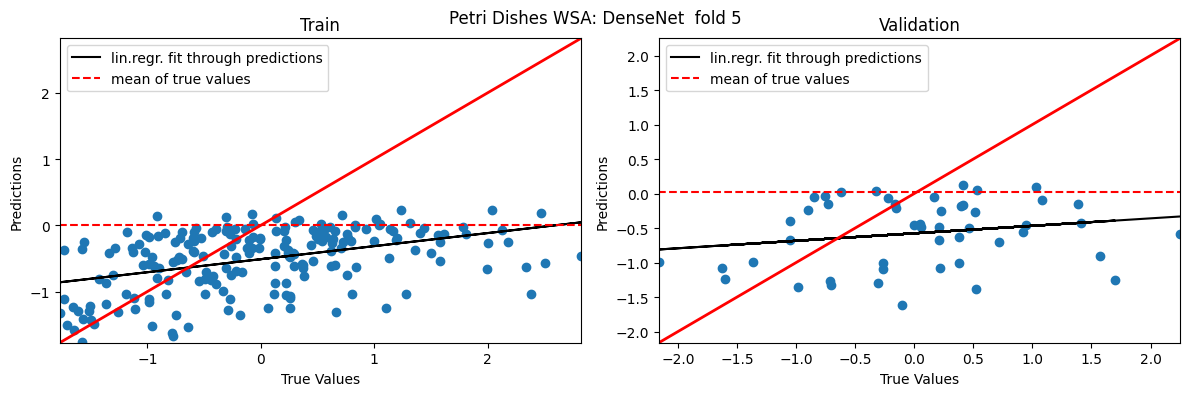

Train RMSE: 1.0396615840785801, MAE: 0.7987277914304285
Validation RMSE: 1.1103339600242703, MAE: 0.9011801667808026


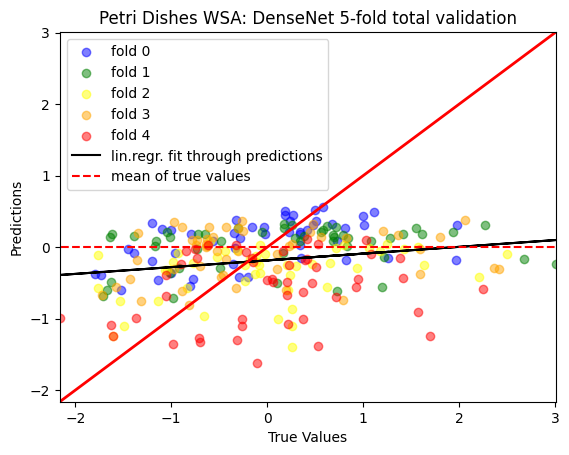

Total validation RMSE: 1.023285850831078
Total validation MAE: 0.8132141905282081


In [15]:
run_5fold('DenseNet','Petri Dishes','WSA', model_dict,splits,X_col,y,True,build_densenet)